fNIRS (Functional Near-Infrared Spectroscopy): measuring near-infrared light propegating through the scalp and brain, for functional monitoring and imaging of brain hemodynamics (changes in hemoglobin oxygenation in response to neural activity).

fNIRS estimates the concentration of hemoglobin from changes in absorption of near infrared light (by the tissues in the brain). Hemoglobin is a significant absorber of near-infrared light, so changes in absorbed light can be used to measure changes in hemoglobin concentration.

The technique takes advantage of the optical window in which (a) skin, tissue, and bone are mostly transparent to NIR light (700–900 nm spectral interval) and (b) hemoglobin (Hb) and deoxygenated-hemoglobin (deoxy-Hb) are strong absorbers of light (so it's only mainly getting absorbed by hemoglobin, and not other tissues).

fNIRS focuses primarily on absorption: differences in the absorption spectra of deoxy-Hb and oxy-Hb allow the measurement of relative changes in hemoglobin concentration through the use of light attenuation at multiple wavelengths. 

Two or more wavelengths are selected, with one wavelength above and one below the isosbestic point of 810 nm—at which deoxy-Hb and oxy-Hb have identical absorption coefficients. Using the modified Beer-Lambert law (mBLL), relative changes in concentration can be calculated as a function of total photon path length.

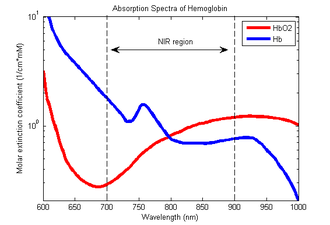

General Beer-Lambert law: 

absorption = (absorption constant of material absorbing light)*(optical path length in cm)*(concentration of material absorbing light)

Multi-channel fNIRS measurements create a topographical map of neural activation, whereby temporal correlation between spatially separated events can be analyzed. Functional connectivity is typically assessed in terms correlations between the hemodynamic responses of spatially distinct regions of interest (ROIs).

Currently, there are three modalities of fNIR spectroscopy:

1. Continuous wave
    
    Continuous wave (CW) system uses light sources with constant frequency and amplitude.
    

2. Frequency domain

    Frequency domain (FD) system comprises NIR laser sources which provide an amplitude-modulated sinusoid at frequencies near 100 MHz. FD-fNIRS measures attenuation, phase shift and the average path length of light through the tissue.
    

3. Time-domain

    Time domain (TD) system introduces a short NIR pulse with a pulse length usually in the order of  picoseconds—around 70 ps. Through time-of-flight measurements, photon path-length may be directly observed by dividing resolved time by the speed of light. Information about hemodynamic changes can be found in the attenuation, decay, and time profile of the back-scattered signal. 

EXAMPLE from https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html

using example motor data from a single subject. It has optodes placed over the motor cortex. There are three conditions:

tapping the left thumb to fingers

tapping the right thumb to fingers

a control where nothing happens

The tapping lasts 5 seconds, and there are 30 trials of each condition.

In [316]:
#load packages

import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
import mne

main file formats for fNIRS data are .nirs (matlab-based) and SNIRF (can be used outside of matlab).  .nirs files can be converted to SNIRF files. NIRx (brand) devices also produce specific NIRx files, with each file giving info about a specific thing, like a wavelength file for raw data from one wavelength of light, or a trigger file for input triggers.

In [317]:
#loads the dataset
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()

In [318]:
#adds new file to path called "Participant-1"
fnirs_cw_amplitude_dir = op.join(fnirs_data_folder, 'Participant-1')

In [319]:
#reads in NIRX fNIRS recording with the format:
# mne.io.read_raw_nirx(fname, verbose = None)
# where fname is path to NIRX data folder or header file
# changing to verbose = True makes output have more info

#returns a Raw object containing raw NIRX data in FIF format (fractal image file, which
# stores an image with fractals, which are smaller graphics that can be repeated within an 
# image and resized without losing image quality)

#all attributes of Raw objects listed here: https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw

raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose=True)
raw_intensity.load_data()

Loading C:\Users\taubm\mne_data\MNE-fNIRS-motor-data\Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>

info for using diff data formats! https://mne.tools/stable/auto_tutorials/io/30_reading_fnirs_data.html


format of the objects so I can practice making my own of the format (channel type of hemoglobin, absorption data at timepoints): 
https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html#tut-creating-data-structures


start here with doing this after food break. then I can do my analysis without this package.

-----------------------------------------------------------SNIRF datatype info: https://github.com/fNIRS/snirf/blob/master/snirf_specification.md

.snirf (basic filetype) files are renamed HDF5 format files. 

About HDF5 files: https://www.neonscience.org/resources/learning-hub/tutorials/about-hdf5

The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data. HDF5 uses a "file directory" like structure that allows you to organize data within the file in many different structured ways, as you might do with files on your computer.

HDF5 format is self describing. This means that each file, group and dataset can have associated metadata that describes exactly what the data are.

in snirf:

The HDF5 format defines "groups" (H5G class) and "datasets" (H5D class) that are the two primary data organization and storage classes used in the SNIRF specification. (groups can contain groups and data. data does not contain groups)

lists the meaning of the group/dataset titles and what they mean: https://github.com/fNIRS/snirf/blob/master/snirf_specification.md#snirf-data-format-summary

it starts with /formatVersion and then /nirs{i} which is the root-group for 1 or more NIRS data

helpful way to look at the files in python: https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/



In [320]:
import h5py

path to an example SNIRF file

C:\Users\taubm\Desktop\mne-nirs\motion_artifacts_1\6016

so go to motion_artifacts_1\6016 from current directory and load file "6016_ma.snirf"

"C:\Users\taubm\Desktop\mne-nirs\motion_artifacts_1\6016\6016_ma.snirf"


**important! I think the data I'm using is from this paper **
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4445402/

titled "Effect of motion artifacts and their correction on near-infrared spectroscopy oscillation data: a study in healthy subjects and stroke patients"

"Functional near-infrared spectroscopy is prone to contamination by motion artifacts (MAs)"


from the paper:"In the present study, we chose as our metric of interest the correlation between oxyhemoglobin fluctuations measured at rest on symmetrical channels bilaterally on the forehead."



full abstract of the paper:

Functional near-infrared spectroscopy is prone to contamination by motion artifacts (MAs). Motion correction algorithms have previously been proposed and their respective performance compared for evoked brain activation studies. We study instead the effect of MAs on “oscillation” data which is at the basis of functional connectivity and autoregulation studies. We use as our metric of interest the interhemispheric correlation (IHC), the correlation coefficient between symmetrical time series of oxyhemoglobin oscillations. We show that increased motion content results in a decreased IHC. Using a set of motion-free data on which we add real MAs, we find that the best motion correction approach consists of discarding the segments of MAs following a careful approach to minimize the contamination due to band-pass filtering of data from “bad” segments spreading into adjacent “good” segments. Finally, we compare the IHC in a stroke group and in a healthy group that we artificially contaminated with the MA content of the stroke group, in order to avoid the confounding effect of increased motion incidence in the stroke patients. After motion correction, the IHC remains lower in the stroke group in the frequency band around 0.1 and 0.04 Hz, suggesting a physiological origin for the difference. We emphasize the importance of considering MAs as a confounding factor in oscillation-based functional near-infrared spectroscopy studies.

data collection:

NIRS data were collected in two distinct groups: 46 healthy adults and 36 stroke patients. NIRS optodes were placed bilaterally and symmetrically on the forehead, with, on each side, one source (690 and 830 nm) and one detector 3 cm away, avoiding the midline sinus. Additional channels were recorded at other locations in the two groups, but were not analyzed for the present study. NIRS recordings were acquired at a sampling rate of 200 Hz and were subsequently downsampled to 25 Hz.

Each dataset consisted of 10 min of resting-state NIRS recording. Both the healthy subjects and stroke patients were placed in a supine position in a silent room with a constant temperature and the light dimmed. After 15 min of rest in the supine position, a 10-min trial of spontaneous breathing was acquired.

In [321]:
import os

startpath = os.getcwd()

filepath = os.path.join(startpath,
                        "motion_artifacts_1",
                        "6016",
                        "6016_ma.snirf")

simplefile = os.path.join(startpath, "Simple_Probe.snirf")
print(filepath)

C:\Users\taubm\Desktop\mne-nirs\motion_artifacts_1\6016\6016_ma.snirf


In [322]:
file = h5py.File(filepath, 'r')

simplefile = h5py.File(simplefile, 'r')

In [323]:
list(file.keys())

['formatVersion', 'nirs']

In [324]:
list(file['nirs'].keys())

#probe gives the wavelengths of the probes

['aux1',
 'aux2',
 'aux3',
 'aux4',
 'aux5',
 'aux6',
 'aux7',
 'aux8',
 'data1',
 'metaDataTags',
 'probe',
 'stim01',
 'stim1']

In [325]:
list(file['nirs']['metaDataTags'].keys())

['AppName',
 'FrequencyUnit',
 'LengthUnit',
 'MeasurementDate',
 'MeasurementTime',
 'SnirfDraft',
 'SubjectID',
 'TimeUnit']

In [326]:
list(file['nirs']['data1'].keys())

['dataTimeSeries',
 'measurementList1',
 'measurementList10',
 'measurementList11',
 'measurementList12',
 'measurementList13',
 'measurementList14',
 'measurementList15',
 'measurementList16',
 'measurementList17',
 'measurementList18',
 'measurementList19',
 'measurementList2',
 'measurementList20',
 'measurementList21',
 'measurementList22',
 'measurementList23',
 'measurementList24',
 'measurementList25',
 'measurementList26',
 'measurementList27',
 'measurementList28',
 'measurementList3',
 'measurementList4',
 'measurementList5',
 'measurementList6',
 'measurementList7',
 'measurementList8',
 'measurementList9',
 'time']

In [327]:
file['nirs/data1'].get('dataTimeSeries')

<HDF5 dataset "dataTimeSeries": shape (19700, 28), type "<f8">

In [328]:
file['nirs/data1'].get('time')

<HDF5 dataset "time": shape (19700,), type "<f8">

OKAY I'VE GOT IT!!! so 'dataTime series' has time-varying signals from all channels. the 'measurementlist1', etc. have the per-channel source detector info (so I think there were 28 channels?).

under 'time', it gives the actual time based on the metaDataTag time unit

In [329]:
def printname(name):
    print(name)

file['nirs/data1/measurementList1'].visit(printname)

dataType
dataTypeIndex
detectorGain
detectorIndex
moduleIndex
sourceIndex
sourcePower
wavelengthIndex


In [330]:
#to print all subgroups/data

def printname(name):
    print(name)
    
file.visit(printname)

formatVersion
nirs
nirs/aux1
nirs/aux1/dataTimeSeries
nirs/aux1/name
nirs/aux1/time
nirs/aux1/timeOffset
nirs/aux2
nirs/aux2/dataTimeSeries
nirs/aux2/name
nirs/aux2/time
nirs/aux2/timeOffset
nirs/aux3
nirs/aux3/dataTimeSeries
nirs/aux3/name
nirs/aux3/time
nirs/aux3/timeOffset
nirs/aux4
nirs/aux4/dataTimeSeries
nirs/aux4/name
nirs/aux4/time
nirs/aux4/timeOffset
nirs/aux5
nirs/aux5/dataTimeSeries
nirs/aux5/name
nirs/aux5/time
nirs/aux5/timeOffset
nirs/aux6
nirs/aux6/dataTimeSeries
nirs/aux6/name
nirs/aux6/time
nirs/aux6/timeOffset
nirs/aux7
nirs/aux7/dataTimeSeries
nirs/aux7/name
nirs/aux7/time
nirs/aux7/timeOffset
nirs/aux8
nirs/aux8/dataTimeSeries
nirs/aux8/name
nirs/aux8/time
nirs/aux8/timeOffset
nirs/data1
nirs/data1/dataTimeSeries
nirs/data1/measurementList1
nirs/data1/measurementList1/dataType
nirs/data1/measurementList1/dataTypeIndex
nirs/data1/measurementList1/detectorGain
nirs/data1/measurementList1/detectorIndex
nirs/data1/measurementList1/moduleIndex
nirs/data1/measurementList

In [331]:
file['nirs/data1/measurementList1/dataType']

<HDF5 dataset "dataType": shape (1,), type "<f8">

In [332]:
file['nirs/data1/measurementList1'].get('dataTypeIndex')[:]

array([0.])

In [333]:
data = np.array(file.get('nirs/aux5/dataTimeSeries'))

In [334]:
list(file['nirs/probe'].keys())

['correlationTimeDelayWidths',
 'correlationTimeDelays',
 'detectorLabels',
 'detectorPos2D',
 'frequencies',
 'sourceLabels',
 'sourcePos2D',
 'timeDelayWidths',
 'timeDelays',
 'wavelengths']

In [335]:
#so these were the wavelengths of the probes! getting somewhere

file['nirs/probe'].get('wavelengths')[:]

array([690., 830.])

In [336]:
file['nirs/probe'].get('frequencies')[:]

array([1.])

In [337]:
list(file['nirs/metaDataTags'].keys())

['AppName',
 'FrequencyUnit',
 'LengthUnit',
 'MeasurementDate',
 'MeasurementTime',
 'SnirfDraft',
 'SubjectID',
 'TimeUnit']

In [338]:
s = np.array(file['nirs/metaDataTags'].get('TimeUnit'))

In [339]:
print(s) #okay so don't know the time unit

[b'unknown']


In [340]:
file['nirs/metaDataTags'].get('FrequencyUnit')[:]

array([b'unknown'], dtype='|S8')

In [341]:
#this is my data, I think, the light intestities recieved
#at each of the 28 detector optodes at that time
#I think this is the raw optical density data
data = np.array(file.get('nirs/data1/dataTimeSeries'))

In [342]:
data.shape

(19700, 28)

In [343]:
data[:10, 0]

array([124173.26238738, 124197.80548034, 124675.01207291, 124166.28212696,
       123917.32194527, 123982.10154254, 123879.88498167, 123803.52254405,
       123769.1639345 , 123683.74367998])

In [344]:
file['nirs/data1/measurementList28'].get('dataType')[:]


array([1.])

In [345]:
list(simplefile.keys())

['formatVersion', 'nirs']

In [346]:
print(simplefile.get('formatVersion')[:])

[[b'1' b'.' b'0']]


In [347]:
list(simplefile['nirs'].keys())

['metaDataTags', 'data1', 'probe', 'stim1', 'stim2', 'stim3', 'aux1']

In [348]:
list(simplefile['nirs/metaDataTags'].keys())

['SubjectID',
 'MeasurementDate',
 'MeasurementTime',
 'LengthUnit',
 'TimeUnit',
 'FrequencyUnit']

In [349]:
a = simplefile['nirs/metaDataTags'].get('LengthUnit')[:]
print(a)

[[b'c' b'm']]


In [350]:
a = a.astype('str')

In [351]:
a = a.flatten()

In [352]:
s = a[1:-1]

In [353]:
s = "".join(s)
s = s.replace("'", "")

In [354]:
print(s)

In [355]:
def formatwords(a):
    #a is an array
    a = a.flatten()
    a = a.astype('str')
    a = "".join(a)
    
    print(a)
    return a

In [356]:
f = simplefile['nirs/metaDataTags'].get('FrequencyUnit')[:]
print(f)

[[b'H' b'z']]


In [357]:
f2 = formatwords(f)

Hz


In [358]:
print(f2)

Hz


In [359]:
metadata = simplefile['nirs/metaDataTags']


In [360]:
t = metadata.get('TimeUnit')[:]

t = formatwords(t)

s


In [361]:
list(simplefile['nirs/data1'].keys())

['dataTimeSeries', 'measurementList1', 'time']

In [388]:
dataTimeSeries = simplefile['nirs/data1'].get('dataTimeSeries')[:]

In [389]:
dataTimeSeries.shape

#I think there are 8 probes, but I only have
#the measurementlist info for 1.
#datatimeseries has
# the dimensions of <# time pts, #channels>

#the columns are mapped by the measurementList__
#the first column is mapped by measurementList1
#which is dataTimeSeries[:,1]. or maybe all the info
#for all 8 probes was put into momentList1
#unclear about this part

#the 8 indices in the datatimeseries are:
#'dataType',
 #'dataTypeIndex',
 #'detectorGain',
 #'detectorIndex',
 #'moduleIndex',
 #'sourceIndex',
 #'sourcePower',
 #'wavelengthIndex'

(1200, 8)

In [390]:
list(simplefile['nirs/data1/measurementList1'].keys())

['dataType',
 'dataTypeIndex',
 'detectorGain',
 'detectorIndex',
 'moduleIndex',
 'sourceIndex',
 'sourcePower',
 'wavelengthIndex']

In [412]:
L1 = simplefile['nirs/data1/measurementList1']

#oh! so like for wavelengthindex, it's the index
#in probe.wavelengths

#and gives index of the list of detectors, modules, etc.
#oh so I think the data points here are for 
#detectors 1, 2, 3, 4 then 1,2,3,4 in the 8 columns
#first did 1,2,3,4 with 690 nm, then did 1,2,
#1,2,3,4 with 830nm. everything else was 
# constant

for key in list(L1.keys()):
    print(L1.get(key)[:])

[[1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 2. 3. 4. 1. 2. 3. 4.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 2. 2. 2. 2.]]


In [413]:
list(simplefile['nirs/probe'].keys())

L1.get('wavelengthIndex').shape

(1, 8)

In [414]:
simplefile['nirs/probe'].get('wavelengths')[:]

array([[690., 830.]])

In [415]:
simplefile['nirs/probe'].get('detectorPos2D')[:]

array([[0., 0.],
       [4., 0.],
       [0., 4.],
       [4., 4.]])

In [416]:
dataTimeSeries[:,1].shape

(1200,)

In [417]:
t = simplefile['nirs/data1'].get('time')[:]

In [418]:
t.shape

(1200, 1)

In [419]:
list(simplefile['nirs/probe'].keys())

['correlationTimeDelays',
 'correlationTimeDelayWidths',
 'detectorLabels1',
 'detectorLabels2',
 'detectorLabels3',
 'detectorLabels4',
 'frequency',
 'sourceLabels',
 'timeDelays',
 'timeDelayWidths',
 'wavelengths',
 'detectorPos2D',
 'sourcePos2D']

In [420]:
formatwords(simplefile['nirs/probe'].get('detectorLabels1')[:])

D1


'D1'

In [422]:
#so I think dataTimeSeries is the raw optical densities
dataTimeSeries[1,:10]

array([ 980.10922405,  987.89424186, 1019.68580469, 1001.80943528,
        999.43805349, 1011.24523361, 1017.01519997, 1009.69142583])

In [426]:
#make sure absorption is >= zero

np.any(dataTimeSeries < 0)

False

info about processing the data before analyzing it from file:///C:/Users/taubm/Downloads/brainsci-11-00606.pdf:
## paper: Data Processing in Functional Near-Infrared Spectroscopy (fNIRS) Motor Control Research


# Why use pre-processing and processing for raw fNIRS optical density data

**HRF = hemodynamic response function**

The primary goal of the pre-processing and processing of fNIRS data is to isolate
the hemodynamic changes occurring in the vascular network of the gray matter. This is
achieved by filtering raw data and estimating a HRF through modeling. These are referred
to as pre-processing and processing, respectively. **In pre-processing, the objective is toremove extraneous noise from the raw data.** Noise can be classified as either systematic
such as respiration, cardiac pulsation (heart rate), and changes in blood pressure. or motion artefact (MA) noise [9,22,23]. Noise removal techniques are applied prior to
the HRF estimation. **Frequently used pre-processing techniques include frequency filters,
wavelet, and smoothing filters.** Additionally, alternative methods such as **pre-whitening**
can be used. Once the raw data has undergone pre-processing, methods are used to convert
changes in light intensity to concentration changes in hemoglobin. **Processing is used to
compare baseline and task-related hemodynamic changes [24].** These can be separated
into either **general linear model (GLM) or non-GLM processing methods** such as block
averaging and linear mixed models.


# Pre-processing techniques

## Systematic Noise Removal:

Systematic noise can be introduced into the fNIRS signal from environmental/
instrumental sources, cardiac pulsation, respiration, and cyclic changes in arterial bloodpressure known as Mayer waves. Filtering can be employed for this noise from the fNIRS
signal to be removed. Variation can be introduced into the fNIRS signal as a result of thetype of pre-processing technique used [25–27]. Researchers must choose appropriate filters
that remove systematic noise while preserving the functional hemodynamic signal.



There are two general types of frequency filters: **infinite impulse response (IIR)** and
**finite impulse response (FIR)** filters. The mathematical equations for these two types
of filters differ in their filter coefficients, which are calculated as the ratio between the
sampling frequency of the system and the cutoff frequency of the filter [28].

Main Pre-processing techniques include:
## Low-Pass, High-Pass, and Bandpass Filters:

A low-pass filter passes signals with a frequency lower than a selected cutoff frequency
and attenuates signals with frequencies higher than the cutoff frequency [28]. Similarly,
a high-pass filter passes frequencies higher than a cutoff while attenuating lower ones.
The band-pass filter passes frequencies within a certain band, while outside the band,
frequencies are attenuated. In these filters, the passband describes the range of frequencies
passed through the bandpass filter, whereas the stopband describes the range of frequencies
that are attenuated.

These filters are used in fNIRS to attenuate high- and low-frequency physiological
and instrumental noise. The low-pass filter is used to attenuate very high frequency
noise arising from the environment such as extraneous light, and physiological noise such
as cardiac pulsation and respiration. The high-pass filter is used to attenuate very low
frequency oscillations, specifically those from baseline drift, which can arise from the
Brain Sci. 2021, 11, 606 6 of 23
gradual movement of the optodes on the scalp. The bandpass filter is a simple combination
of a low-pass and high-pass filter, in that it passes a certain band of frequencies and
attenuates the frequencies located outside of the band (Figure 5)

When these filters are used, differences in physiology between populations and
individuals may necessitate the adjustment of filter parameters. For example, athletes
have lower resting cardiac pulsation than non-athletes [32]. In the case of a low-pass
filter, the researcher would have to potentially lower the cutoff frequency to account for
the lower resting heart rate of the athlete. For the higher resting heart rate of the nonathlete, the researcher could potentially use a higher cutoff frequency for the low-pass
filter. Additionally, the type of task used can influence filter decisions. For example,
heart rate and respiration rate increase during exercise vs. non-exercise motor tasks [33].
Therefore, **implementing a filter with a “one-size-fits-all” cutoff frequency is not ideal. In
consideration of these factors, applying a fast Fourier transform (FFT) to an fNIRS dataset
will allow the researcher to visually inspect the data and determine the spectral location
of noises within a dataset.** Although no definitive parameters have been defined in the
literature, Naseer and Hong [31] recommend a passband of 0.1~0.4 Hz to remove most
physiological and instrumental noises from fNIRS data if the task period is 10 s in length.

## Smoothing Filters

This technique is most frequently used to decrease the presence of high-frequency
noise in fNIRS data. Smoothing filters can thus be a type of low-pass filter. However,
the difference is the method by which smoothing filters reduce high-frequency noise. For
example, the moving average filter smooths signals by averaging neighboring points
and using that average as the new value of a point [37]. In the low-pass filter, however,
lower frequencies are passed, and higher frequencies are specifically attenuated. There are many different types of smoothing algorithms, some of the most frequently used in oursearch being the **moving average [38–40], Gaussian smoothing [41–43], and Savitzky–Golay
smoothing filters [44,45].**


Signals can be smoothed by either smoothing in the time domain or in the spatial
domain. Time domain smoothing reduces the contribution of high-frequency noise in the
data, whereas spatial smoothing averages signals from poor channels with the surrounding
fNIRS channels, reducing the effect of the noisy channel while still preserving some of its
signal [46]

The **moving average** type of smoothing works by averaging a number of data
points together, reducing high-frequency fluctuations [47]. **Gaussian** smoothing involves a Gaussian weighting function, which multiplies the value of each point according to where
it is on the distribution. The center of the Gaussian is set on one point, which is weighted
along with the neighboring points. The distribution is then moved to the next point and the
process is repeated [48,49]. **Savitzky–Golay** smoothing is mostly employed to smooth over
spike MAs (motion artifacts) [50]. It can also be used to smooth physiological noise in the data; however, the
reasons for why this filter is appropriate are unclear in this circumstance [51]. This type of
filter uses a least-squares polynomial to fit the fNIRS data within a certain window while
preserving some higher frequencies [52]

## Pre-Whitening to remove Systematic Noise

One of these changes is known as pre-whitening. The premise of this technique relies on the fact that fNIRS data contains systematic physiological noise, which
varies in a predictable way. Since this noise is predictable, there are certain frequencies
that are over-represented in the noise distribution, which consequently violate one of the
GLM assumptions for a normal distribution of noise [54]. As such, pre-whitening can
be implemented to estimate this noise and subsequently reduce the weights of the overrepresented frequencies in the noise distribution. Specifically, an autoregressive model isfit to the residual noise from a first pass of the GLM. This model is then applied to both
sides of the GLM equation to “whiten” the data (Equation (1)). (read more at https://opg.optica.org/boe/fulltext.cfm?uri=boe-4-8-1366&id=259422)

W*Y = W*X*B + E 

## Motion Artefact Correction, Wavelet Filter

MAs can be introduced into the fNIRS signal by head movements that cause the
source detector pair to shift relative to the scalp. Visually, MAs can present as rapid and
very large changes in magnitude (spikes) relative to the baseline data. These spikes can
be several orders of magnitude larger than the tissue-related hemodynamic changes. These large spikes can be identified through qualitative
visual inspection. Once identified, the segment of data containing the MA can be removed
from the overall signal. Mathematically based filtering methods can also be used to
remove MA from the data.


**Wavelet filters** are used to filter out different types of noise, but mostly spike MAs
(Figure 6) [60]. Wavelet filtering is based on the premise that *cortical signal is composed of
different frequencies than MAs* [60]. Wavelet filtering begins with the base mother wavelet,
which is scaled and translated to create daughter wavelets [61]. The fNIRS recording
is then decomposed using these daughter wavelets. . It does this by estimating the number of wavelet
coefficients required to fit the wavelet transform to the data, and then using the minimum
number.

The probability threshold, α, is then set by the researcher to know which wavelet coefficients to remove from the distribution, i.e., if a coefficient does not meet the probability threshold, then it is labeled an artifact and is decreased in signal amplitude [23]. This method of filtering relies on the assumption that MAs oscillate much faster in time
than fNIRS hemodynamic signals [60]. As such, MAs that result from slower movements
over time are not identified by this filter.

Wavelets are *not* good for removing artefacts with slower oscillations [58]. With improper usage, MAs are not removed efficiently from the data.

The two types of wavelets are **CWT and
DWT**, which decompose the fNIRS recording on the basis of non-discretized or discretized
wavelet parameters, respectively


## Principal Component Analysis for Motion Artefact Correction

PCAs operate under the assumption that MAs present in the data would
occur in all channels and produce similar temporal variation. The PCA technique arranges
the data in a matrix containing the number of time points by the number of channels. A
set of orthogonal vectors is then derived from this matrix in decreasing order on the basis
of the amount of variance present in each vector. The MA produces the greatest amount
of variance present across all channels, which is captured by the principal components.
A percentage of variance present in all channels is then used to remove a number of
components from the data [66]. Once these components have been removed, the remaining
components are used to reconstruct the signal.

 A **tPCA** operates on the same principles as
described above but is only applied to the section of data that contains the MA. The tPCA
has been shown to be more robust in preserving hemodynamic response contaminated by
MA compared to wavelet-based filtering and spline interpolation 

# Processing Techniques

## General Linear Model (GLM)

**HRF = hemodynamic response function**

The GLM is a method of statistical modelling for fNIRS data. The GLM utilizes predictors to describe the largest sources of variability within the fNIRS data.The GLM is a method of statistical modelling for fNIRS data. The GLM utilizes predictors to describe the largest sources of variability within the fNIRS data. For example, the researcher would input their task timings into the model, along with the predictor that describes the hemodynamic
response, either through estimation or assumption of the shape of the HRF. 

Some studies
model the hemodynamic response with a linear combination of gamma functions as a
predictor [68–70], assuming the shape of the hemodynamic response function. Other
studies use a deconvolution procedure [71], which estimates the hemodynamic response
with a series of Gaussian functions spaced in increments along the task period.

**In its simplest form, the GLM is represented by a linear equation** (Equation (2)), in
which the amplitude of the hemodynamic response in one channel (Y) is equal to the
predictor (X) multiplied by the “weight” of that predictor (β) plus the error term (ε).

### Y = X * β + ε


Predictors are given weight in the model regarding how much that predictor contributes to the variability of the signal. In other words, if the researcher’s estimate/
assumption of the shape of the hemodynamic response is correct, then that estimate will be
given a higher weight by the model. The error term in the equation represents all noise in
the recording, consisting of physiological, instrumental, and motion noise.

The **GLM has assumptions regarding the data and the noise** in the system. These
assumptions are as follows:

1. Task responses are non-stochastic (non-random) and are the same across trials of the same task.

2. Noise is independently and identically distributed, with a mean of zero and with some amount of variance around that point.

    * Noise is homoscedastic, meaning there is noise from only one distribution in the data.
    
    * Noise is not serially correlated, meaning that past noise does not affect future noise.
    
    
3. Predictors are not linear derivations of each other.


An additional consideration for the GLM is that the researcher can avoid the uncertainty of the differential path length factor (DPF) [57], a term used to correct for the extra
distance that NIR light travels in the cortex due to light scatter from biological tissues.


Group analysis of fNIRS data can also be easily completed using a multi-level GLM analysis [57]. However, **fNIRS data seem to violate many of the GLM assumptions,** particularly regarding the
contents of the noise [67]. **MAs and systematic physiological noise violate the assumption
that noise is independent [55], thus leading to biased results from the GLM. Specifically,
noise comes from multiple distributions and is not independently distributed [24].**

There are many different ways to solve the GLM equation, which can affect the final
results. Specifically, a least squares approximation is used to solve the model by correcting
for differences between the model’s prediction and the actual fNIRS data [76]. Ordinary
least squares (OLS) and iteratively reweighted least squares (IRLS) are just some of the
different methods used to solve the GLM. OLS operates under the assumptions that the
noise has a zero-centered mean, is independent, and is identically distributed. However,
the assumption of a zero-centered mean can be violated if the data contains MAs, which
produces heavy tailed noise [55]. As well, the assumption of independence is violated
as noise in fNIRS data contains serially correlated errors [77]. In contrast, IRLS is a more
robust solving method in which the GLM equation is first solved with weighted least
squares (WLS), but then is iteratively solved after recalculating the βs until the point when
the βs do not change a significant amount [55].


The GLM also has multiple assumptions, of which fNIRS violates
many. However, with proper removal of noise-related artifacts, assumptions can be met
and therefore the true hemodynamic response can be assessed.

## Block Averaging for processing

Block averaging is a frequently used fNIRS processing method [29]. This processing
method uses simple weighted averaging for fNIRS signals in blocks of task periods [78].
After this point, statistical procedures may be performed to assess if the HRF is different
from baseline signals.

This method is very simple and thus may be easier to implement for newer fNIRS researchers [79]. However, **the GLM is preferred to this method** as the HRF can be derived simultaneously along with the removal of noise components [80].
Additionally, the estimation of the response tends to be more accurate and robust utilizing
the GLM when compared to block averaging [81,82]. Another consideration for block
averaging is that **it does not utilize the time course of the HRF**, which is important in NIRS analysis.The GLM, however, is more statistically powerful than block averaging as it
considers the entire time-course of fNIRS data [29].

## Linear Mixed Models for processing

A linear mixed effects model is another potential processing method for fNIRS data.
This model, like the GLM, assumes that the fNIRS time-series is a linear combination
of regressors [57]. However, the additional aspect of this method is that it also includes
a term for random effects, meaning it accounts for both within- and between-subject
variability [83]. One advantage to using this type of model is that parameters unique
to single participants can be evaluated. Additionally, this method can be used to model
temporal changes non-linearly [84]. One potential disadvantage of using this model is the
restricted maximum likelihood (ReML) that is used to estimate the noise in the data [55].


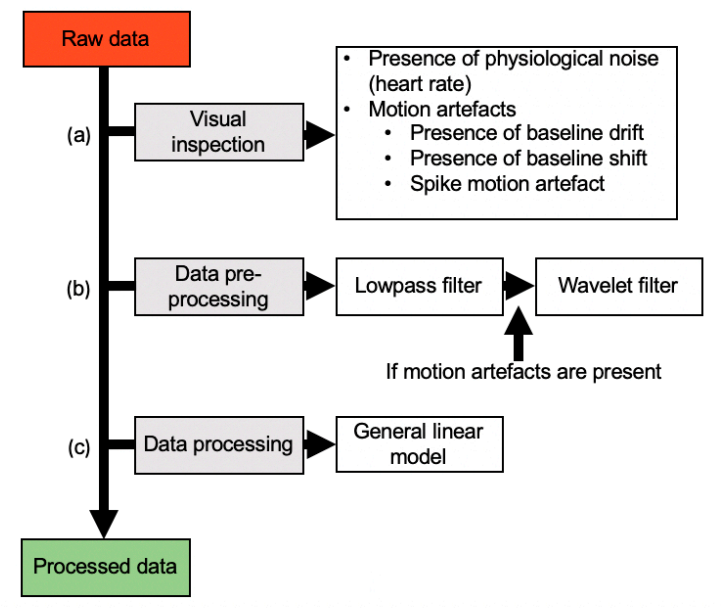

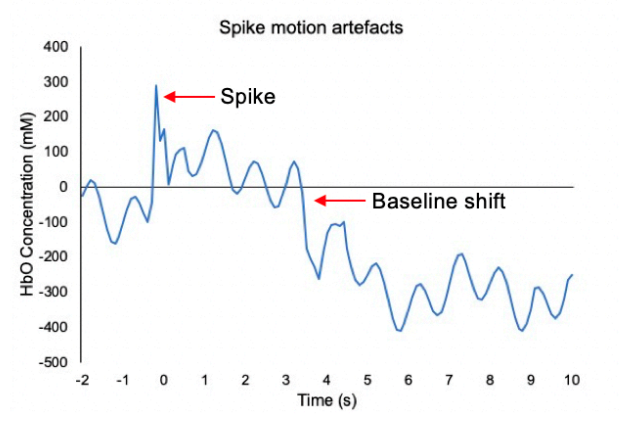

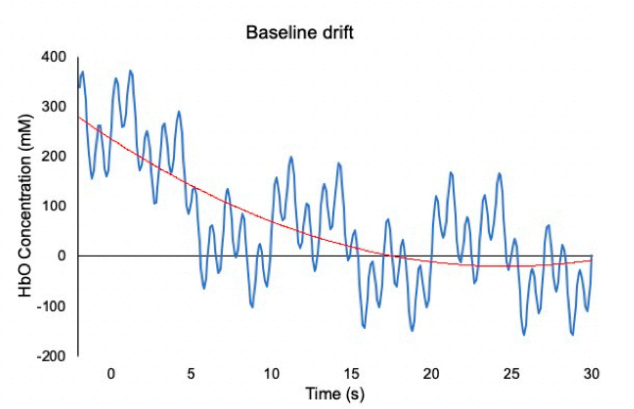

### Good Summary of whole paper:

*Figure caption*: **Data processing pipeline composed of the most common techniques over the past decade.**

(a) Raw data should first be inspected for the presence of physiological noise and MAs. The presence of physiological noise in the data shows
that optodes are coupled to the scalp. Different types of MAs can arise in fNIRS data. Spike MAs and baseline shifts are caused by rapid changes in optode position across the scalp. Baseline drift can occur due to slow, constant movement of optodes across the scalp. 

(b) Data are subsequently subjected to pre-processing. The most common pre-processing technique
identified was the frequency filter. Within frequency filters, low-pass filters were the most common. If the data possesses MAs, MA correction methods can be applied to the data in the pre-processing stage. The most common technique used for MA correction was found to be the wavelet filter. 

(c) Once the data have been pre-processed, further processing techniques can be applied to derive the HRF. The most common technique used for this purpose over the past decade was the GLM.



___________________________________________________
Statistical analysis preview: use C:/Users/taubm/Downloads/hue_dang.pdf

From the paper:

For analysis, will need to use

### Baseline correction where the mean of the baseline is subtracted from each time point in the trial.


For visualization, the lengths of conditions across trials and across subjects were normalized, wherein
samples at the onset of a condition whose condition’s length was longer than the minimum condition’s
length were excluded. After normalization, the lengths of stimulus presentation and control condition
were 30.21 and 30.34 seconds respectively. Baseline correction was applied per trial where the mean of
the baseline was subtracted from each time point in the trial. After that, average of concentration changes
per time point across all repetitions and across all subjects was calculated for each type of concentration
changes.


For statistical tests, the data in the normalized length conditions were used, which did not alter the
statistical test result as the number of samples which were removed at the onset of each condition was
small (up to 2 samples). RM ANOVA was used to test the significance of location (O1, Oz, O2, 5% above O1
and 5% above O2), condition (stimulus presentation and baseline) and the interaction between location
and condition. The data for each RM ANOVA test were the mean of tHb, HbO or Hb changes across trials
in each condition per subject, per channel, 5 locations x 2 conditions x 11 subjects. Post-hoc t-test with
Bonferroni adjustment on the same data was used for pairwise comparison when any of the effects in the
results of RM ANOVA was significant. For each set of locations, there were 3 RM ANOVA tests and up to
9 post-hoc tests, corresponding to 3 types of concentration changes (tHb, HbO and Hb) and 3 effects
(location, condition and the interaction between location and condition). All statistical inferences were
based on an adjusted alpha level of 5%.

use these example files: C:\Users\taubm\Desktop\mne-nirs\examples\general
        
        
tomorrow use this set of examples from C:\Users\taubm\Desktop\mne-nirs\mne_nirs

use github for guidance: https://github.com/mne-tools/mne-nirs


then can use the mne tools but also look at the documentation to see how every function is happening and understand it from there. and can see the data processing and analysis. I can do it!!

Beers-Lambert law: https://mne.tools/mne-nirs/_modules/mne/preprocessing/nirs/_beer_lambert_law.html#beer_lambert_law
